In [13]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [14]:
init = State(R=200 , L=0 , E=0 , V=4e-7)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [15]:
system = System(init=init, Y=1.36 , m=.00136 , t=.2 , B=.00027 , p=.1 , a=.036 , s=2 , d=0.33 , pi=100 , t0 = 0 , t_end = 120, dt=.1)

,values
init,R 2.000000e+02 L 0.000000e+00 E 0.000...
Y,1.36
m,0.00136
t,0.2
B,0.00027
p,0.1
a,0.036
s,2
d,0.33
pi,100


In [16]:
def update_func(state, t, system):
    
    
    unpack(system)
    
    R , L , E , V = state
   
    #system = System(Y=1.36 , m=.00136 , t=.2 , B=.00027 , p=.1 , a=.036 , s=2 , d=0.33 , pi=100 , t0 = 0 , t_end = 120, dt=.25)

    dr = (Y*t) - (m*R) - (B*R*V)
    dl = (p*B*R*V) - (m*L) - (a*L)
    de = ((1 - p)*B*R*V) + (a*L) - (d*E)
    dv = (pi*E) - (s*V)
    
    R += dr*dt
    L += dl*dt
    E += de*dt
    V += dv*dt
    
    return State(R=R , L=L , E=E , V=V)

In [17]:
def run_simulation(system, update_func):
    
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [18]:
def plot_results(R , L , E , V):
   
    plot(R, '--', label='R')
    plot(L, '-', label='L')
    plot(E, ':', label='E')
    #plot(V, '-', label='V')
    decorate(xlabel='Time (minutes)',
             ylabel='Amount')

In [19]:
results = run_simulation(system, update_func)
plot_results(results.R , results.L , results.E, results.V)

KeyError: 'the label [0.6000000000000001] is not in the [index]'

In [20]:
def slope_func(state, t, system):
    
    unpack(system)
    
    R , L , E , V = state
   
    #system = System(Y=1.36 , m=.00136 , t=.2 , B=.00027 , p=.1 , a=.036 , s=2 , d=0.33 , pi=100 , t0 = 0 , t_end = 120, dt=.25)

    drdt = (Y*t) - (m*R) - (B*R*V)
    dldt = (p*B*R*V) - (m*L) - (a*L)
    dedt = ((1 - p)*B*R*V) + (a*L) - (d*E)
    dvdt = (pi*E) - (s*V)
    
    return drdt, dldt, dedt, dvdt

In [21]:
init= State(R=200 , L=0 , E=0 , V=4e-7)
system = System(init=init, Y=1.36 , m=.00136 , t=.2 , B=.00027 , p=.1 , a=.036 , s=2 , d=0.33 , pi=100 , t0 = 0 , t_end =120, dt=.1)

,values
init,R 2.000000e+02 L 0.000000e+00 E 0.000...
Y,1.36
m,0.00136
t,0.2
B,0.00027
p,0.1
a,0.036
s,2
d,0.33
pi,100


In [22]:
results, details = run_ode_solver(system, slope_func)

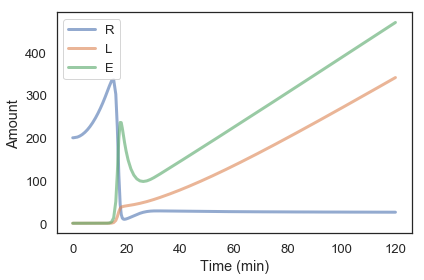

In [23]:
plot(results.R, label='R')
plot(results.L, label='L')
plot(results.E, label='E')

decorate(xlabel='Time (min)',
         ylabel='Amount')

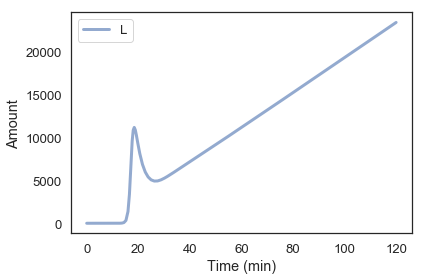

In [24]:
plot(results.V, label='L')

decorate(xlabel='Time (min)',
         ylabel='Amount')